# try to extract the features using pca

reference:https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf

(67, 100, 3)


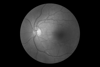

In [26]:
# greyscale the images
# the numbers are to be determined in the future discussions
import packages.small_batch_images as sbim
import numpy as np
from PIL import Image
df = sbim.load_annotation()

# load the 5th normal case
# for the sake of simplicity, here we use the thumbnail
img = sbim.load_left_eye_image(df, "N", 5)
img.thumbnail((100, 100))

# convert the image to an numpy array
img = np.array(img)
img = img/225
print(img.shape)

# generate the grey scale of the image (3 channels to 1)
M = 0.299*img[:,:,0]+0.587*img[:,:,1]+0.114*img[:,:,2]

# display the image
display(Image.fromarray(( M * 255).astype(np.uint8)))


So far so good. the next step is to vectorize the image.

Then each image will be a data point for PCA

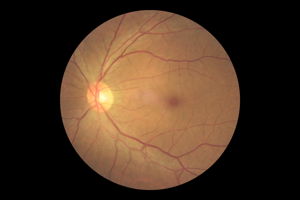

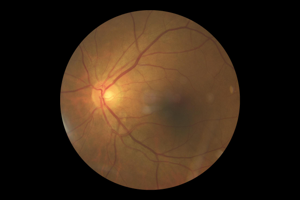

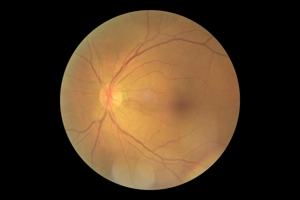

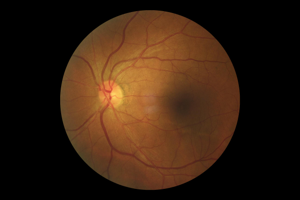

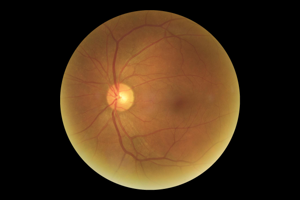

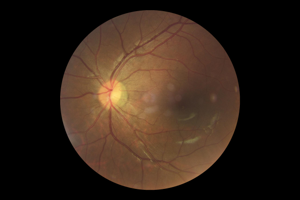

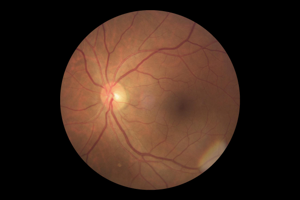

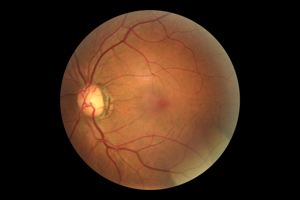

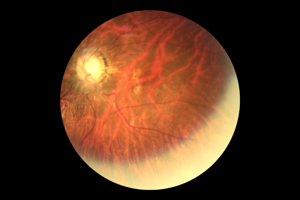

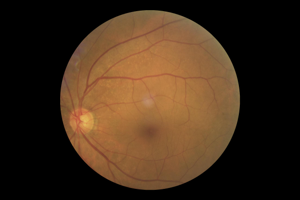

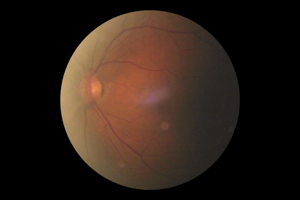

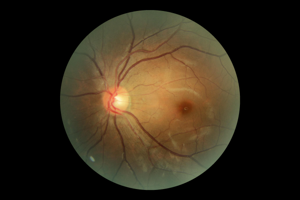

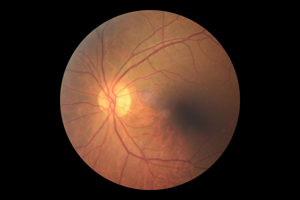

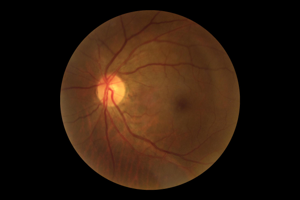

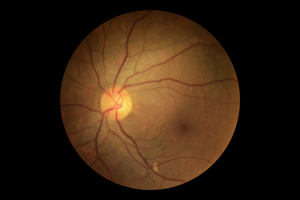

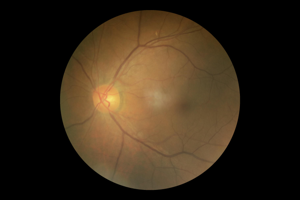

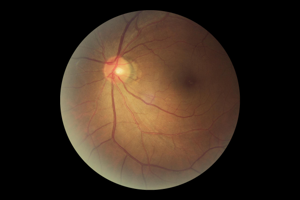

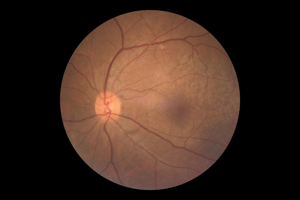

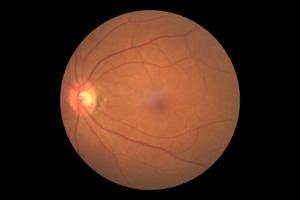

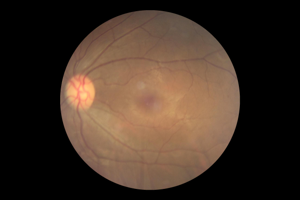

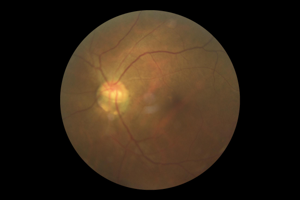

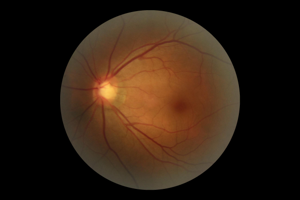

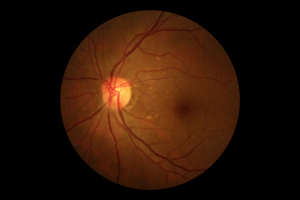

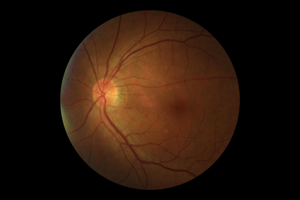

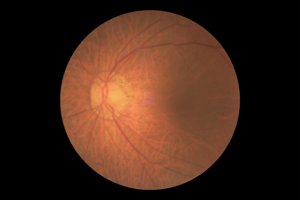

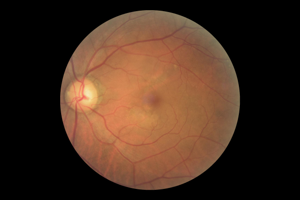

In [106]:
dataset = []
for i in range(50):
    img = sbim.load_left_eye_image(df, "N", i)
    img.thumbnail((300, 300))
    img_array = np.array(img)
    img_array = img_array/225
    if img_array.shape[0] != 200: continue
    display(img)

    img_array = 0.299*img_array[:,:,0]+0.587*img_array[:,:,1]+0.114*img_array[:,:,2]
    img_array = img_array.reshape(1, -1).squeeze()
    dataset.append(img_array)

dataset = np.array(dataset)
shape = np.array(img).shape


By a really dirty work, we got the resized sample images.

The images shown above are quite similar and could be a good starting point for manipulations and trials.


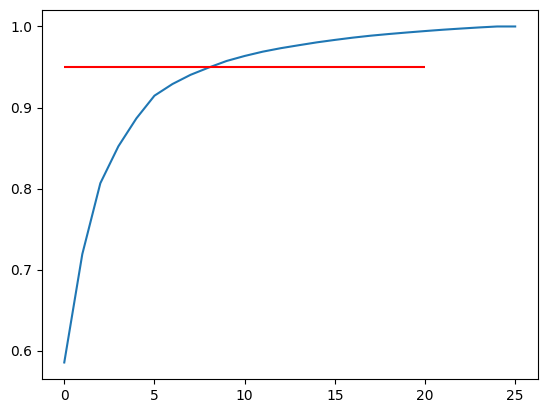

In [107]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA()
pca.fit(dataset)

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.hlines(0.95, 0, 20, colors = "r")
plt.show()


In [108]:
pca.explained_variance_ratio_


array([5.85299972e-01, 1.33713988e-01, 8.75414325e-02, 4.55520610e-02,
       3.45141465e-02, 2.79624710e-02, 1.44054024e-02, 1.13382914e-02,
       8.89267376e-03, 8.19856593e-03, 6.17830443e-03, 5.29712558e-03,
       4.30437174e-03, 3.65224639e-03, 3.53905410e-03, 3.02608545e-03,
       2.81202411e-03, 2.43235630e-03, 2.05047595e-03, 1.86906283e-03,
       1.76609731e-03, 1.65959336e-03, 1.44608520e-03, 1.35675937e-03,
       1.19135340e-03, 3.27796831e-31])

now we display the images got back from the first 8 principal components.

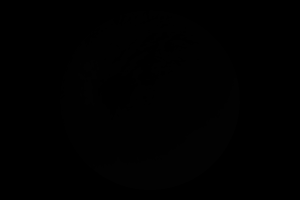

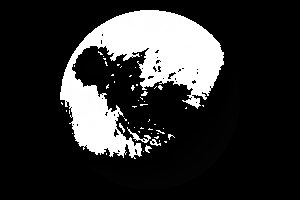

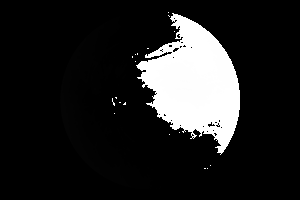

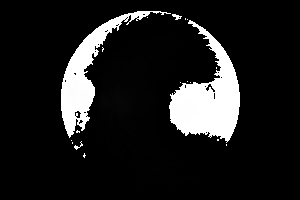

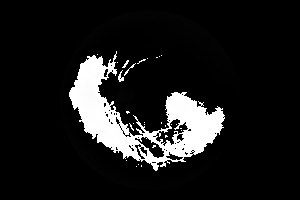

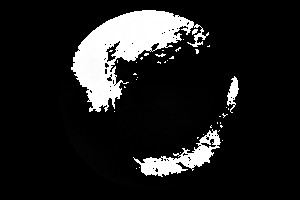

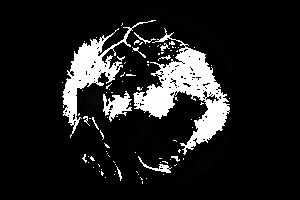

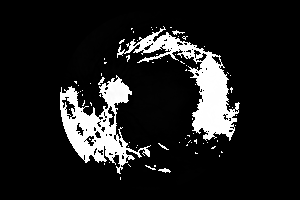

In [109]:
for i in range(8):
    display(Image.fromarray((pca.components_[i].reshape((shape[0],shape[1])) * 255).astype(np.uint8)))


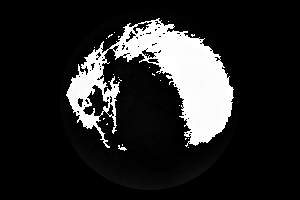

In [110]:
image_sum = pca.components_[:8].sum(axis=0)

display(Image.fromarray((image_sum.reshape((shape[0],shape[1])) * 255).astype(np.uint8)))
